<h1>Detecção de Fraudes</h1>

<h3>A solução pode ser dividida em:</h3>
<ul>
    <li>Análise Exploratória de Dados</li>
    <li>Correlação</li>
    <li>Treinamento de Modelos</li>
    <li>Verificação de Resultados</li>
</ul>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('./fraud_detection_dataset.csv')

<h3>Sobre o conjunto de dados</h3>
<p>Este conjunto de dados tem 6362620 linhas, 11 características e não possui nenhum dado ausente.</p>
<p>A fonte dos dados não foi encontrada mas os dados podem ser encontrados <a href="https://drive.google.com/file/d/1zjK8zQK5zvhR_r2chWI5dCjeOwASlPfb/view">neste link</a>.</p>

<h4>Conteúdo do dataset:</h4>
<ul>
    <li><strong>step:</strong> varia de 1 a 743, representando as horas durante o mes em que foi feita a aquisição de dados.</li>
    <li><strong>type:</strong> o tipo de transação realizada.</li>
    <li><strong>amount:</strong> o valor da transação.</li>
    <li><strong>nameOrig:</strong> o identificador (ID) do remetente da transação (a origem).</li>
    <li><strong>oldbalanceOrg:</strong> o saldo na conta do remetente antes da transação.</li>
    <li><strong>newbalanceOrig:</strong> representa o saldo na conta do remetente após a transação.</li>
    <li><strong>nameDest:</strong> representa o identificador (ID) do destinatário da transação (a conta de destino).</li>
    <li><strong>oldbalanceDest:</strong> representa o saldo na conta do destinatário antes da transação.</li>
    <li><strong>newbalanceDest:</strong> representa o saldo na conta do destinatário após a transação.</li>
    <li><strong>isFraud:</strong> indicador binário que sinaliza se a transação foi classificada como fraudulenta(1) ou legítima(0).</li>
    <li><strong>isFlaggedFraud:</strong> indicador binário que mostra se a transação foi sinalizada como suspeita(1) por algum sistema automatizado</li>
</ul>

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<h2>Análise Exploratória de Dados (EDA)</h2>

<p>Inicialmente vamos analisar a proporção da operações fraudelentas em comparação com as legítimas</p>

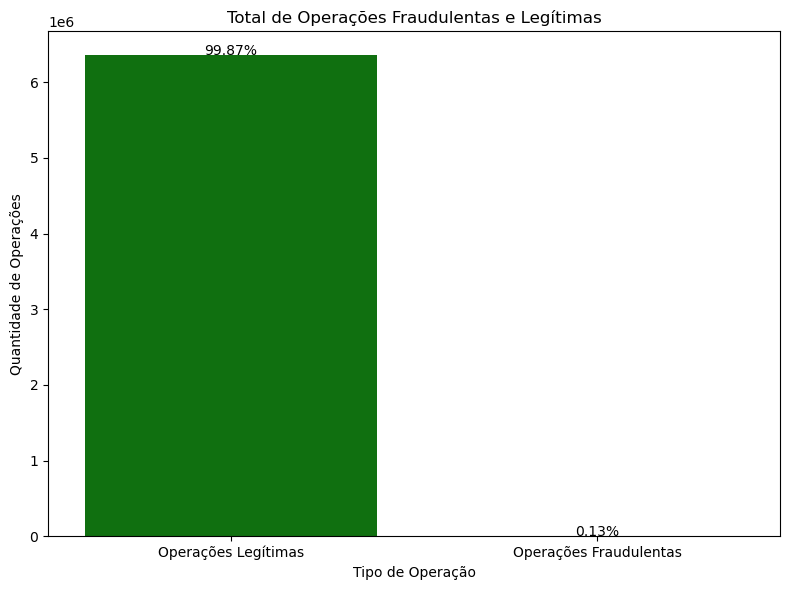

Total de fraudes: 8213


C:\Users\RafaelFernandoNunhoC\AppData\Local\Temp\ipykernel_14660\1603172289.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_frauds = df['Fraude'].value_counts()[1]


In [5]:
df['Fraude'] = df['isFraud'].map({0: 'Operações Legítimas', 1: 'Operações Fraudulentas'})

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Fraude', data=df, hue='Fraude', palette=['green', 'red'], legend=False)

# Adicionando porcentagens acima das barras
total = len(df)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 100, f'{100 * p.get_height() / total:.2f}%', ha="center")

# Configurações de título e rótulos
ax.set(title='Total de Operações Fraudulentas e Legítimas', xlabel='Tipo de Operação', ylabel='Quantidade de Operações')

plt.tight_layout()
plt.show()

#determinando o total de fraudes
total_frauds = df['Fraude'].value_counts()[1]
print(f'Total de fraudes: {total_frauds}')

<p>O conjunto de dados é altamente desequilibrado, as operações fraudulentas representam 0,13% (8213 operações no total) de todas as transações, o que demanda mais atenção durante a modelagem.</p>

<p>Vamos averigar quantas operações fraudulentas foram sinalizadas como suspeita</p>

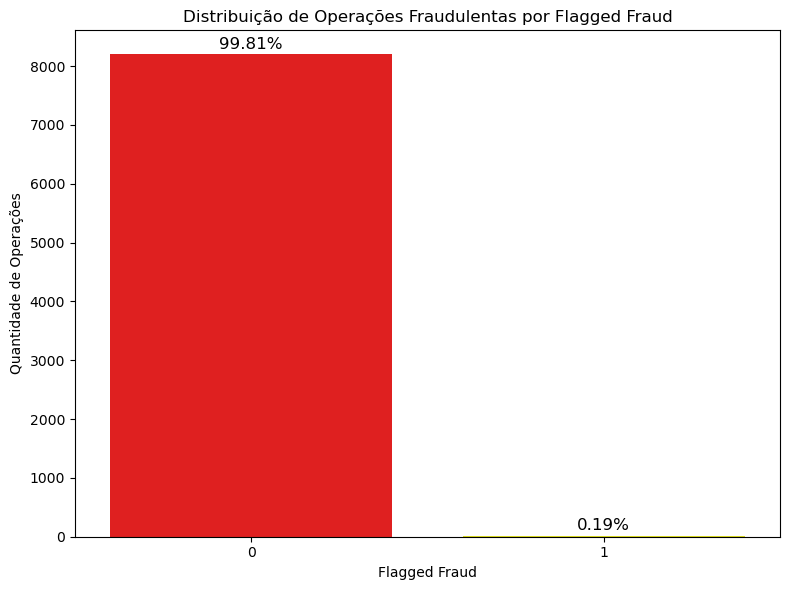

In [8]:
df_fraudulent = df[df['isFraud'] == 1]

# Plotar a distribuição de isFlaggedFraud para as operações fraudulentas
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='isFlaggedFraud', data=df_fraudulent, hue='isFlaggedFraud', palette=['red', 'yellow'], legend=False)

# Adicionar porcentagens acima das barras
total_frauds = len(df_fraudulent)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total_frauds:.2f}%'
    ax.text(p.get_x() + p.get_width() / 2., height + 100, percentage, ha="center", fontsize=12)

# Configurações de título e rótulos
ax.set(title='Distribuição de Operações Fraudulentas por Flagged Fraud', xlabel='Flagged Fraud', ylabel='Quantidade de Operações')

plt.tight_layout()
plt.show()

<p>Logo de cara percebemos que a maior parte (99,81%) das operações fraudulentas não dispararam nenhum alarme de operação suspeita, demonstrando o grande risco que o sistema corre.</p>